In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fuel-economy/fuel.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fuel = pd.read_csv('/kaggle/input/fuel-economy/fuel.csv')

/tmp/ipykernel_33/814057138.py:1: DtypeWarning: Columns (7,44) have mixed types. Specify dtype option on import or set low_memory=False.
  fuel = pd.read_csv('/kaggle/input/fuel-economy/fuel.csv')


In [4]:
fuel.head(10)

,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,...,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,range_ft2,city_range_ft2,highway_range_ft2
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
5,28426,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1880,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
6,27549,1984,AM General,FJ8c Post Office,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1831,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
7,28425,1984,AM General,FJ8c Post Office,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1881,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
8,27593,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle 4WD,4-Wheel or All-Wheel Drive,Automatic 3-Speed,NaN,1524,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
9,28455,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle 4WD,4-Wheel or All-Wheel Drive,Automatic 3-Speed,NaN,1574,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [5]:
fuel.tail(10)

,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,...,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,range_ft2,city_range_ft2,highway_range_ft2
38103,37560,2017,Volvo,V60 FWD,Small Station Wagons,Front-Wheel Drive,Automatic (S8),NaN,88,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38104,38069,2017,Volvo,V60 Polestar AWD,Small Station Wagons,All-Wheel Drive,Automatic (S8),NaN,112,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38105,38412,2017,Volvo,V90 CC AWD,Midsize Station Wagons,All-Wheel Drive,Automatic (S8),NaN,115,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38106,37565,2017,Volvo,XC60 AWD,Small Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,99,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38107,37566,2017,Volvo,XC60 AWD,Small Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,114,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38108,37564,2017,Volvo,XC60 FWD,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),NaN,90,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38109,37547,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,52,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38110,37548,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,53,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38111,37703,2017,Volvo,XC90 AWD PHEV,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,54,SIDI; PHEV,...,0.0,29,32,30,0,0.0,0.0,NaN,13.84,13.3
38112,37687,2017,Volvo,XC90 FWD,Standard Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),NaN,50,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0


In [6]:
# check missing values

missing_values = fuel.isnull().sum()

In [7]:
missing_values

vehicle_id               0
year                     0
make                     0
model                    0
class                    0
                     ...  
city_range_ft1           0
highway_range_ft1        0
range_ft2            38113
city_range_ft2           0
highway_range_ft2        0
Length: 81, dtype: int64

In [10]:
# delete column with NaN Values

del fuel['transmission_type']

In [11]:
del fuel['range_ft2']

In [12]:
fuel.shape

(38113, 79)

In [13]:
fuel.head()

,vehicle_id,year,make,model,class,drive,transmission,engine_index,engine_descriptor,engine_cylinders,...,hours_to_charge_240v,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,city_range_ft2,highway_range_ft2
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,9001,(FFS),6.0,...,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,9005,(FFS) CA model,6.0,...,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,9002,(FFS),4.0,...,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,9006,(FFS) CA model,4.0,...,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1830,(FFS),4.0,...,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0


In [14]:
del fuel['drive']

In [15]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 78 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   vehicle_id                         38113 non-null  int64  
 1   year                               38113 non-null  int64  
 2   make                               38113 non-null  object 
 3   model                              38113 non-null  object 
 4   class                              38113 non-null  object 
 5   transmission                       38102 non-null  object 
 6   engine_index                       38113 non-null  int64  
 7   engine_descriptor                  22693 non-null  object 
 8   engine_cylinders                   37977 non-null  float64
 9   engine_displacement                37979 non-null  float64
 10  turbocharger                       5239 non-null   object 
 11  supercharger                       0 non-null      flo

In [17]:
del fuel['supercharger']

In [18]:
del fuel['fuel_type_2']

In [19]:
fuel.describe()

,vehicle_id,year,engine_index,engine_cylinders,engine_displacement,city_mpg_ft1,unrounded_city_mpg_ft1,city_mpg_ft2,unrounded_city_mpg_ft2,city_gasoline_consumption_cd,...,hours_to_charge_240v,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,city_range_ft2,highway_range_ft2
count,38113.000000,38113.000000,38113.000000,37977.000000,37979.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,...,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000
mean,19170.638496,2000.194527,8799.389001,5.736656,3.317583,17.981109,4.606426,0.546218,0.386633,0.000432,...,0.027635,0.005549,0.082203,0.080891,0.081311,0.469708,0.426249,0.419197,0.043973,0.040051
std,11134.878665,10.464573,17781.058490,1.752254,1.361995,6.849728,10.113963,4.109282,3.861179,0.039976,...,0.473685,0.161014,2.156682,2.052187,2.097794,9.352069,9.104702,9.315914,1.311628,1.169281
min,1.000000,1984.000000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9529.000000,1991.000000,0.000000,4.000000,2.200000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19058.000000,2001.000000,212.000000,6.000000,3.000000,17.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28779.000000,2009.000000,4451.000000,6.000000,4.300000,20.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,38542.000000,2017.000000,69102.000000,16.000000,8.400000,150.000000,150.000000,145.000000,145.083500,5.350000,...,12.000000,7.000000,97.000000,81.000000,88.000000,315.000000,305.900000,346.900000,103.030000,90.550000


Data Visualization

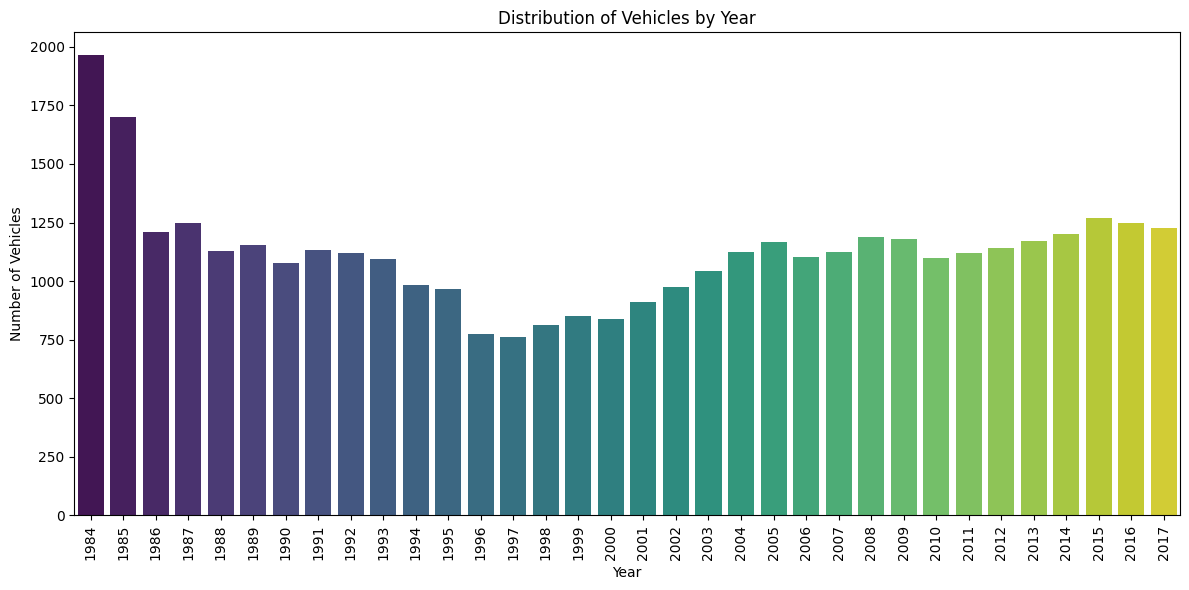

In [21]:
# Distribution of vehicles by year

df = fuel

plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Vehicles by Year')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.tight_layout()
plt.show()

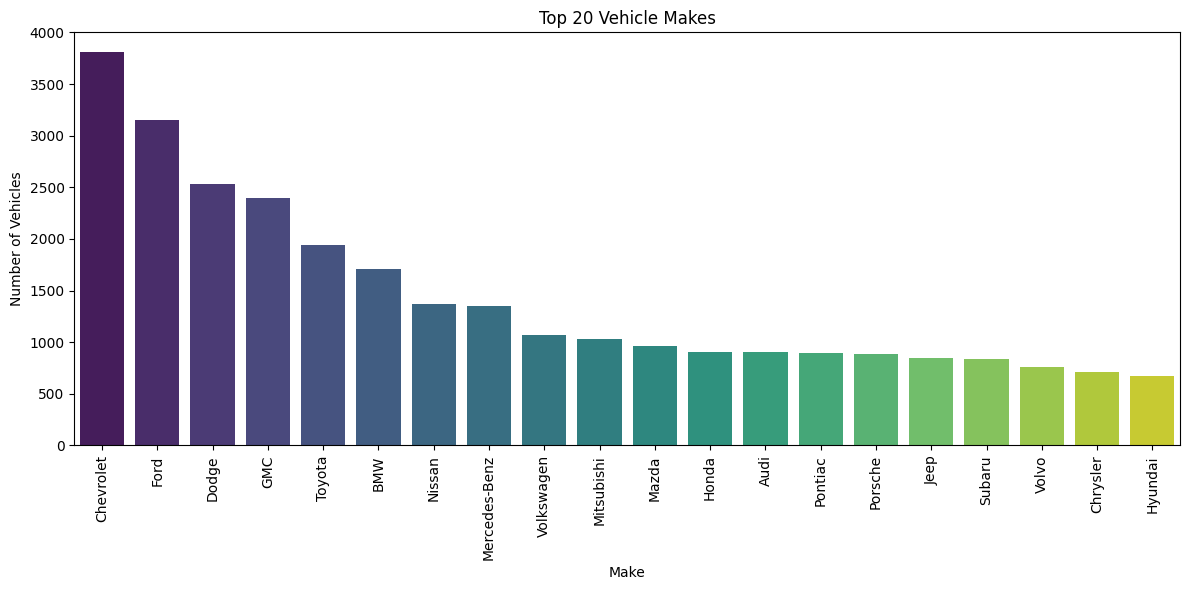

In [22]:
# Distribution of vehicles by make (top 20)

plt.figure(figsize=(12, 6))
top_makes = df['make'].value_counts().nlargest(20)
sns.barplot(x=top_makes.index, y=top_makes.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 20 Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Number of Vehicles')
plt.tight_layout()
plt.show()

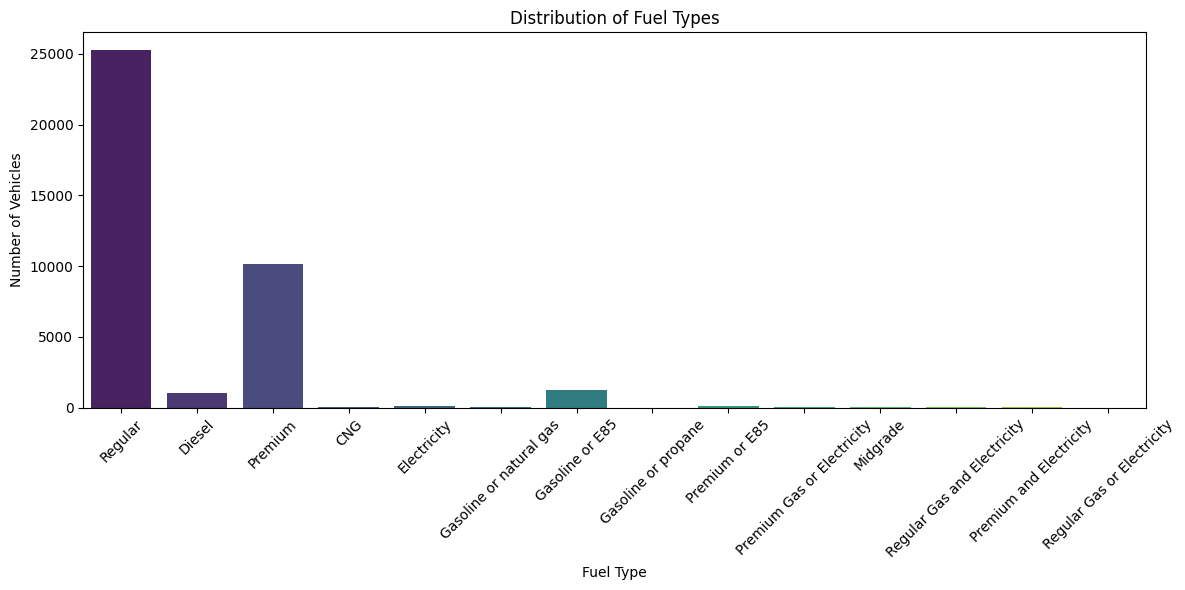

In [23]:
# Distribution of fuel types

plt.figure(figsize=(12, 6))
sns.countplot(x='fuel_type', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Vehicles')
plt.tight_layout()
plt.show()

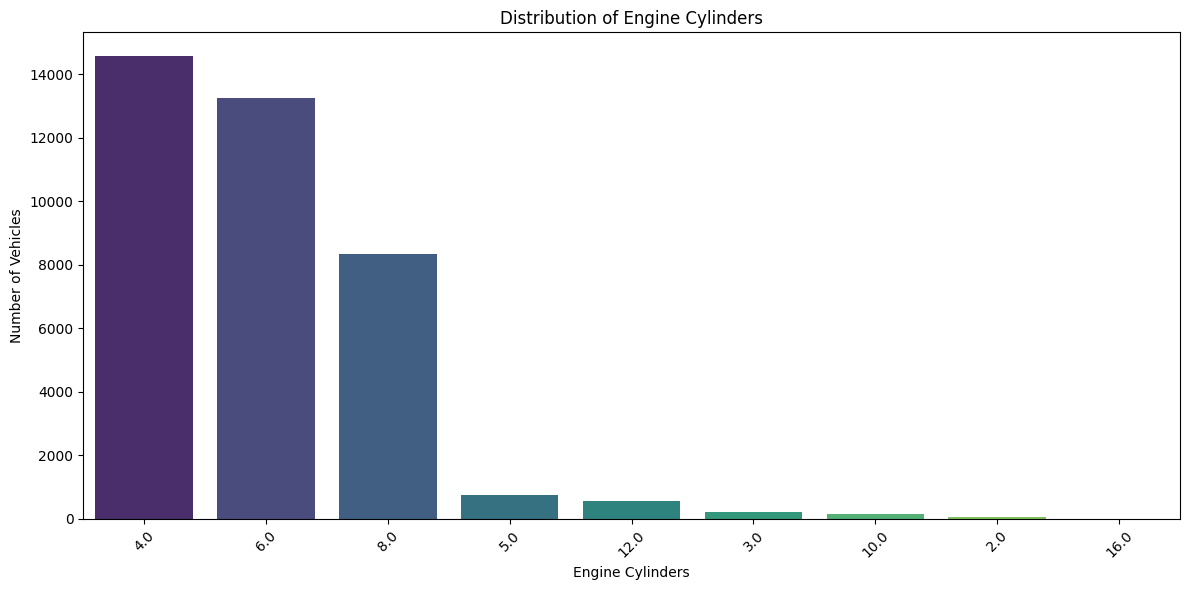

In [27]:
# Distribution of engine cylinders

plt.figure(figsize=(12, 6))
sns.countplot(x='engine_cylinders', data=df, order=df['engine_cylinders'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of Engine Cylinders')
plt.xlabel('Engine Cylinders')
plt.ylabel('Number of Vehicles')
plt.tight_layout()
plt.show()

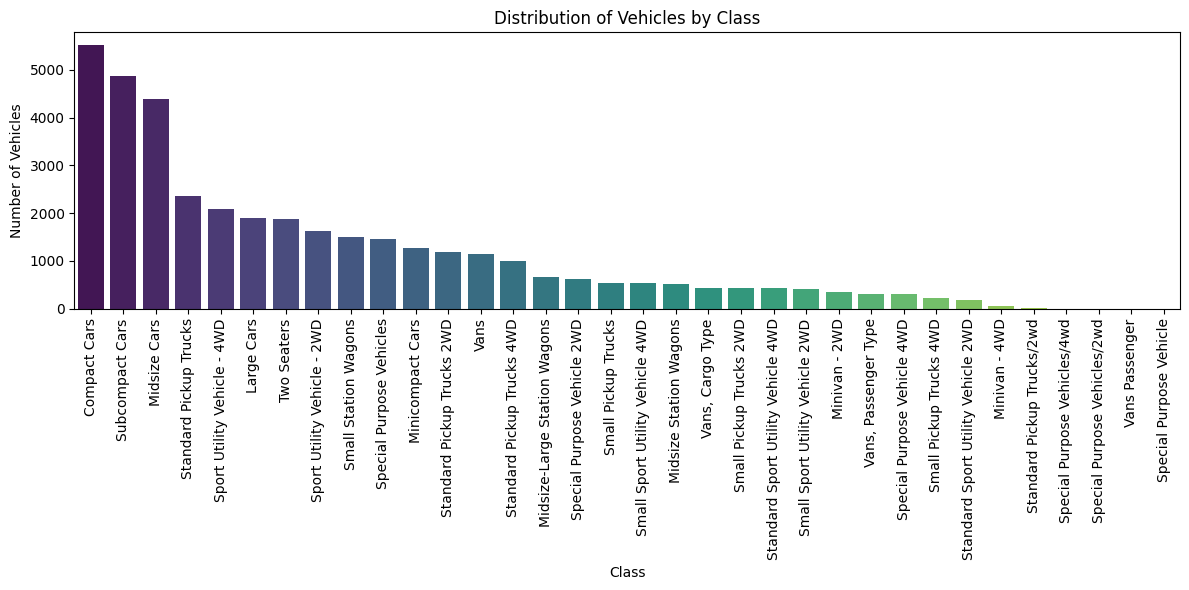

In [28]:
# Distribution of vehicles by class

plt.figure(figsize=(12, 6))
vehicle_classes = df['class'].value_counts()
sns.barplot(x=vehicle_classes.index, y=vehicle_classes.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Vehicles by Class')
plt.xlabel('Class')
plt.ylabel('Number of Vehicles')
plt.tight_layout()
plt.show()